In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid", rc={"lines.linewidth": 4})
plt.rcParams.update({'axes.labelsize': 13.5})

In [2]:
def saveFigure(figure, name):
    fig = figure.get_figure()
    fig.savefig(f'../imagenes/evaluacionModelos/{name}.png', dpi=200, bbox_inches='tight')

### Random Forest

In [3]:
random_forest_df = pd.read_csv('../data/resultados/evaluacionModelos/randomForest.csv', sep=';')
print(random_forest_df.shape)
random_forest_df.head()

(80, 3)


,Tipo,Estimators,Accuracy
0,FULL,10,0.991068
1,FULL,20,0.996715
2,FULL,50,0.996717
3,FULL,100,0.996655
4,FULL,150,0.996698


In [4]:
random_forest_df[random_forest_df['Tipo'] == 'RELATED'].sort_values(by=['Estimators'], ascending=True)

,Tipo,Estimators,Accuracy
40,RELATED,10,0.990894
41,RELATED,20,0.996545
42,RELATED,50,0.996569
43,RELATED,100,0.996513
44,RELATED,150,0.996537
45,RELATED,200,0.996482
46,RELATED,250,0.996540
47,RELATED,300,0.996479
48,RELATED,400,0.996481
49,RELATED,500,0.996481


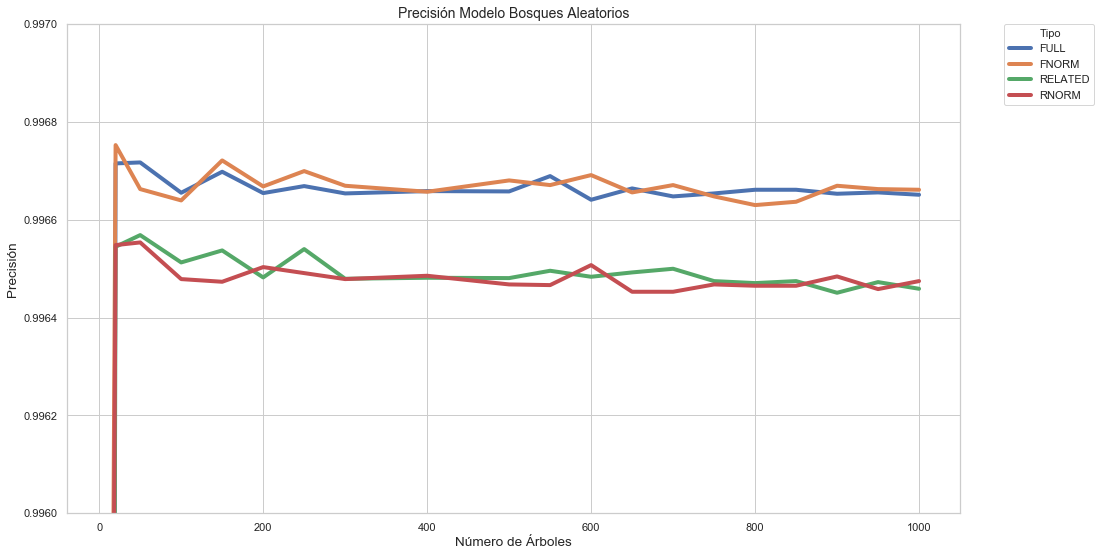

In [5]:
plt.figure(figsize=(16,9))
random_forest_graph = sns.lineplot(x="Estimators", y="Accuracy", hue='Tipo', data=random_forest_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Número de Árboles')
plt.ylabel('Precisión')
plt.ylim([0.996, 0.997])


plt.title("Precisión Modelo Bosques Aleatorios", fontsize=14)

saveFigure(random_forest_graph, "randomForest-global")

### K-Nearest Neighbors 

In [6]:
knn_df = pd.read_csv('../data/resultados/evaluacionModelos/knn.csv', sep=';')
print(knn_df.shape)
knn_df.head()

(144, 3)


,Tipo,Neighbours,Accuracy
0,FULL,1,0.918257
1,FULL,3,0.923865
2,FULL,5,0.923749
3,FULL,7,0.923524
4,FULL,9,0.922100


In [7]:
knn_df[knn_df['Neighbours'] == 13].sort_values(by=['Neighbours'], ascending=True)

,Tipo,Neighbours,Accuracy
6,FULL,13,0.919095
42,FNORM,13,0.919449
78,RELATED,13,0.918441
114,RNORM,13,0.919177


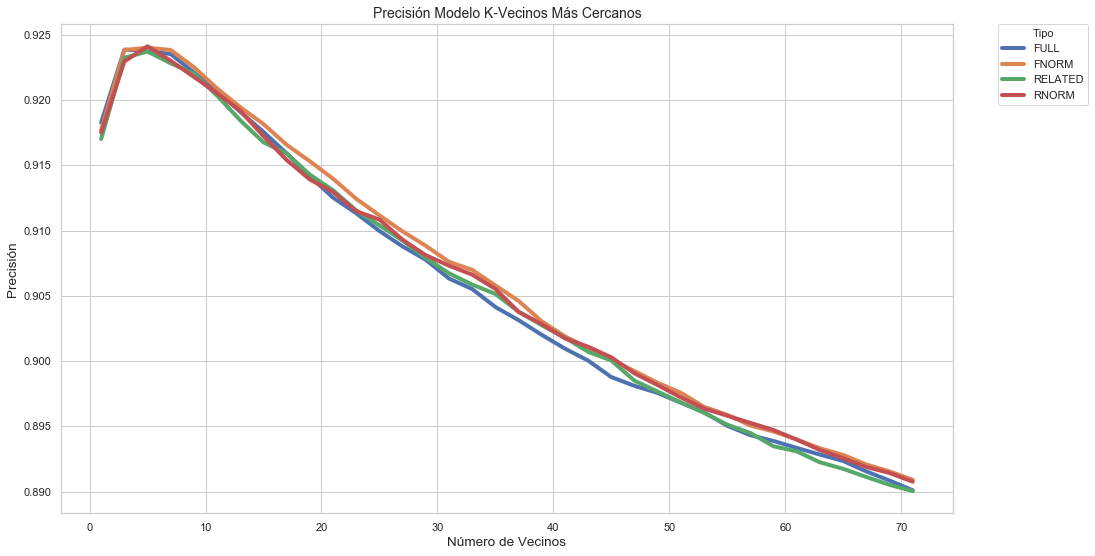

In [8]:
plt.figure(figsize=(16,9))
knn_graph = sns.lineplot(x="Neighbours", y="Accuracy", hue='Tipo', data=knn_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Número de Vecinos')
plt.ylabel('Precisión')
plt.title("Precisión Modelo K-Vecinos Más Cercanos", fontsize=14)

saveFigure(knn_graph, "knn-global")

### Neural Networks

In [9]:
neural_network_df = pd.read_csv('../data/resultados/evaluacionModelos/neuralNetworks.csv', sep=';')
print(neural_network_df.shape)
neural_network_df.head()

(128, 4)


,Tipo,Activation,Accuracy,Epoch
0,FULL,RELU,0.490185,10
1,FULL,IDENTIDAD,0.766613,10
2,FULL,LOGISTICA,0.759554,10
3,FULL,TANH,0.758260,10
4,FULL,RELU,0.511559,20


In [10]:
activation_neural_network_df = neural_network_df[neural_network_df['Epoch'] == 100]
activation_neural_network_df

,Tipo,Activation,Accuracy,Epoch
20,FULL,RELU,0.915816,100
21,FULL,IDENTIDAD,0.915564,100
22,FULL,LOGISTICA,0.760140,100
23,FULL,TANH,0.758362,100
52,FNORM,RELU,0.913793,100
53,FNORM,IDENTIDAD,0.915857,100
54,FNORM,LOGISTICA,0.761312,100
55,FNORM,TANH,0.761755,100
84,RELATED,RELU,0.790018,100
85,RELATED,IDENTIDAD,0.870848,100


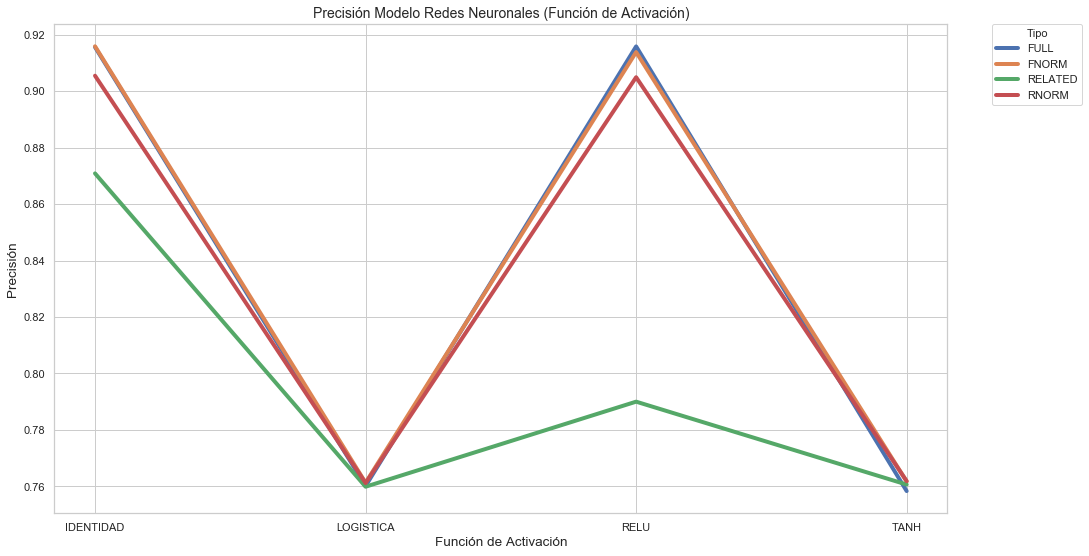

In [11]:
activation_neural_network_df = neural_network_df[neural_network_df['Epoch'] == 100]

plt.figure(figsize=(16,9))

activation_neural_network_graph = sns.lineplot(x="Activation", y="Accuracy", hue='Tipo', data=activation_neural_network_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Función de Activación')
plt.ylabel('Precisión')
plt.title("Precisión Modelo Redes Neuronales (Función de Activación)", fontsize=14)

saveFigure(activation_neural_network_graph, "neural_network-activation-global")

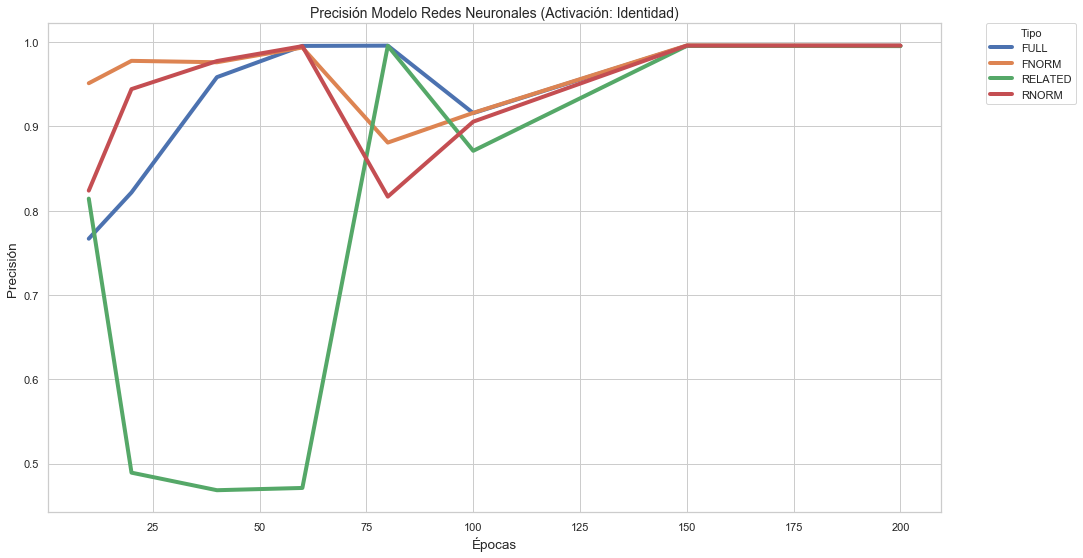

In [12]:
nn_identity_df = neural_network_df[neural_network_df['Activation'] == 'IDENTIDAD']

plt.figure(figsize=(16,9))
nn_identity_graph = sns.lineplot(x="Epoch", y="Accuracy", hue='Tipo', data=nn_identity_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Precisión')
plt.xlabel('Épocas')

plt.title("Precisión Modelo Redes Neuronales (Activación: Identidad)", fontsize=14)

saveFigure(nn_identity_graph, "neural_network-identity-global")


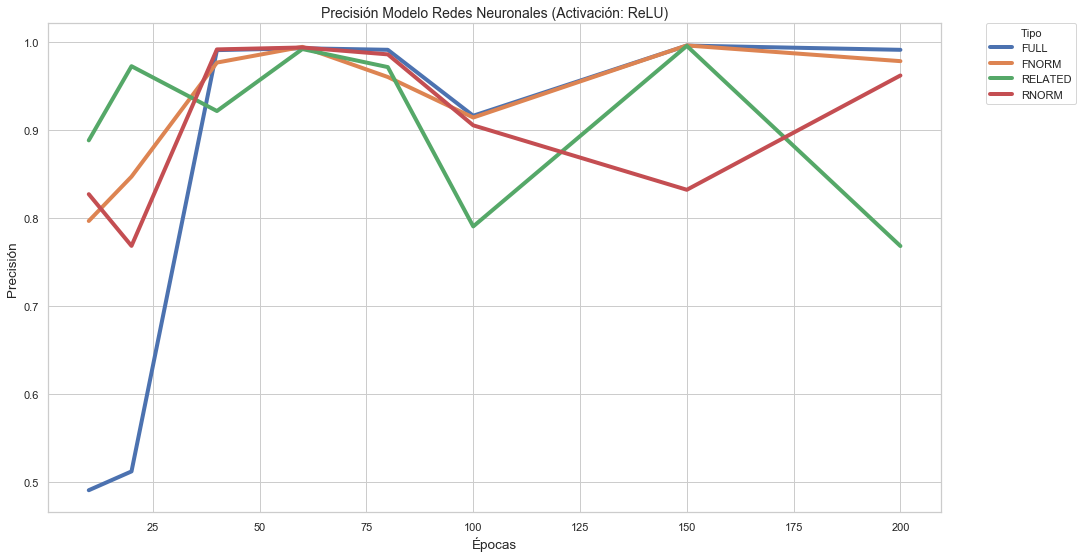

In [13]:
nn_relu_df = neural_network_df[neural_network_df['Activation'] == 'RELU']

plt.figure(figsize=(16,9))
nn_relu_graph = sns.lineplot(x="Epoch", y="Accuracy", hue='Tipo', data=nn_relu_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Precisión')
plt.xlabel('Épocas')

plt.title("Precisión Modelo Redes Neuronales (Activación: ReLU)", fontsize=14)

saveFigure(nn_relu_graph, "neural_network-relu-global")

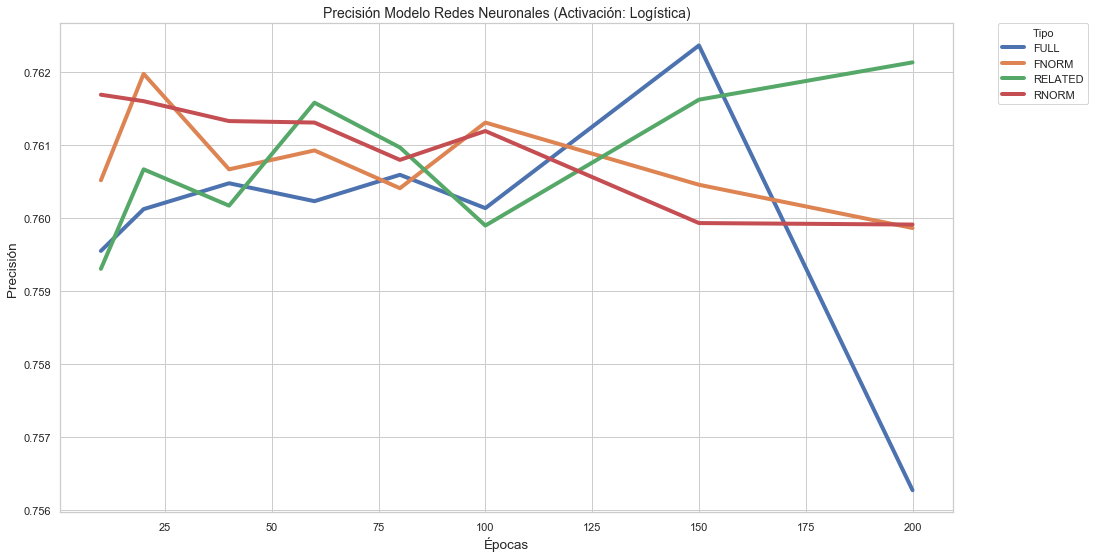

In [14]:
nn_logistic_df = neural_network_df[neural_network_df['Activation'] == 'LOGISTICA']

plt.figure(figsize=(16,9))
nn_logistic_graph = sns.lineplot(x="Epoch", y="Accuracy", hue='Tipo', data=nn_logistic_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.xlabel('Épocas')
plt.ylabel('Precisión')

plt.title("Precisión Modelo Redes Neuronales (Activación: Logística)", fontsize=14)

saveFigure(nn_logistic_graph, "neural_network-logistic-global")

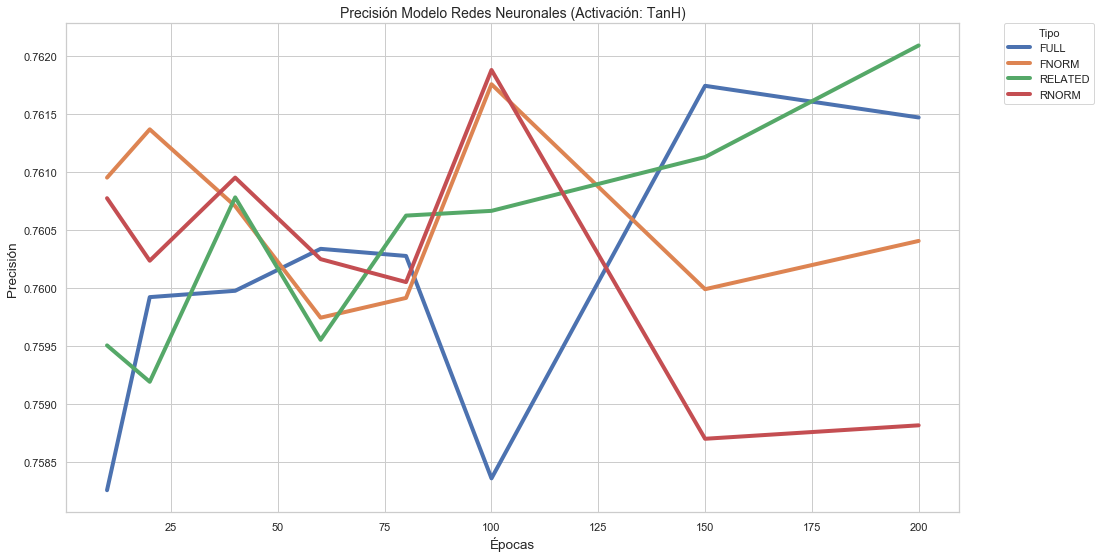

In [15]:
nn_tanh_df = neural_network_df[neural_network_df['Activation'] == 'TANH']

plt.figure(figsize=(16,9))
nn_tah_graph = sns.lineplot(x="Epoch", y="Accuracy", hue='Tipo', data=nn_tanh_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title("Precisión Modelo Redes Neuronales (Activación: TanH)", fontsize=14)

saveFigure(nn_tah_graph, "neural_network-tanh-global")

### Grafica final tomando el mejor de cada tipo

In [16]:
tipos = ["FULL", "FNORM", "RELATED", "RNORM"]
data = []
for typ in tipos:
    if typ in ['RELATED', 'RNORM']:
        max_acc = random_forest_df[random_forest_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[5][2]
        data.append({"Model": "Bosques Aleatorios", "Tipo": typ, "Accuracy": max_acc})

        max_acc = knn_df[knn_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[5][2]
        data.append({"Model": "K Vecinos Más Cercanos", "Tipo": typ, "Accuracy": max_acc})

        max_acc = nn_identity_df[nn_identity_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[3][2]

        max_acc = nn_relu_df[nn_relu_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[3][2]

        max_acc = nn_tanh_df[nn_tanh_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[7][2]
        data.append({"Model": "Tanh", "Tipo": typ, "Accuracy": max_acc})

        max_acc = nn_logistic_df[nn_logistic_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[7][2]
        data.append({"Model": "Logistica", "Tipo": typ, "Accuracy": max_acc})
    
    else:
        max_acc = random_forest_df[random_forest_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[0][2]
        data.append({"Model": "Bosques Aleatorios", "Tipo": typ, "Accuracy": max_acc})

        max_acc = knn_df[knn_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[0][2]
        data.append({"Model": "K Vecinos Más Cercanos", "Tipo": typ, "Accuracy": max_acc})

        max_acc = nn_identity_df[nn_identity_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[0][2]

        max_acc = nn_relu_df[nn_relu_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[0][2]

        max_acc = nn_tanh_df[nn_tanh_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[0][2]
        data.append({"Model": "Tanh", "Tipo": typ, "Accuracy": max_acc})

        max_acc = nn_logistic_df[nn_logistic_df['Tipo'] == typ].sort_values(by=['Accuracy'], ascending=False).iloc[0][2]
        data.append({"Model": "Logistica", "Tipo": typ, "Accuracy": max_acc})

data.append({"Model": "ReLu", "Tipo": "FULL", "Accuracy": 0.9154})
data.append({"Model": "ReLu", "Tipo": "FNORM", "Accuracy": 0.9134})
data.append({"Model": "ReLu", "Tipo": "RELATED", "Accuracy": 0.910123})
data.append({"Model": "ReLu", "Tipo": "RNORM", "Accuracy": 0.9102354})

data.append({"Model": "Identidad", "Tipo": "FULL", "Accuracy": 0.9134})
data.append({"Model": "Identidad", "Tipo": "FNORM", "Accuracy": 0.9114})
data.append({"Model": "Identidad", "Tipo": "RELATED", "Accuracy": 0.910123})
data.append({"Model": "Identidad", "Tipo": "RNORM", "Accuracy": 0.9102354})

data.append({"Model": "Regresión Logística", "Tipo": "FNORM", "Accuracy": 0.7945})
data.append({"Model": "Regresión Logística", "Tipo": "RNORM", "Accuracy": 0.7835})

In [17]:
global_model_data = pd.DataFrame(data)
global_model_data = global_model_data.sort_values(by=['Model'])
global_model_data.head()

,Model,Tipo,Accuracy
0,Bosques Aleatorios,FULL,0.996717
8,Bosques Aleatorios,RELATED,0.996500
4,Bosques Aleatorios,FNORM,0.996753
12,Bosques Aleatorios,RNORM,0.996486
21,Identidad,FNORM,0.911400


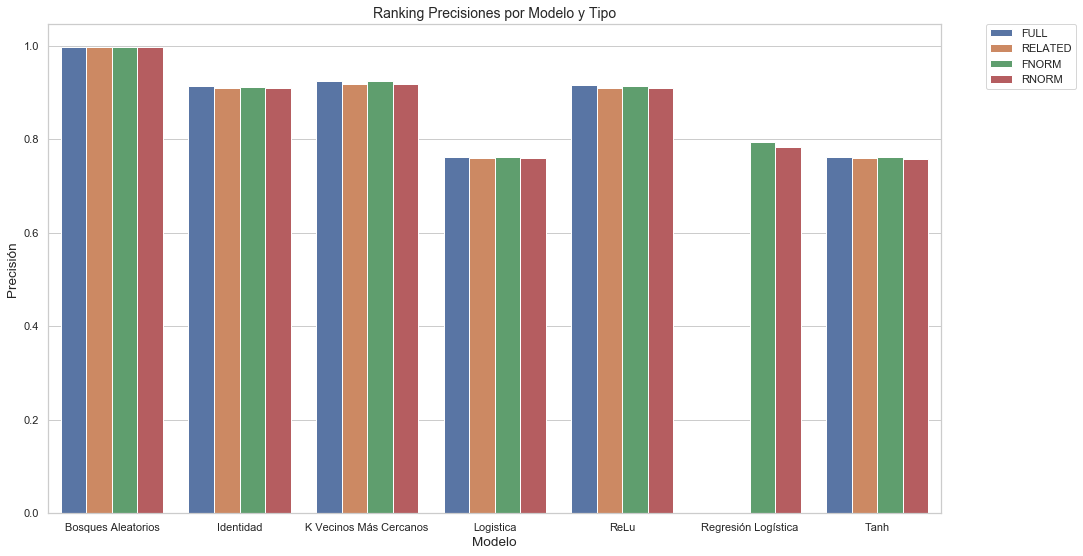

In [18]:
plt.figure(figsize=(16,9))

global_model_graph = sns.barplot(x="Model", y="Accuracy", hue='Tipo', data=global_model_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Modelo')
plt.title("Ranking Precisiones por Modelo y Tipo", fontsize=14)
plt.ylabel('Precisión')

saveFigure(global_model_graph, "models-global")

### Redes Neuronales Por Capas y Neuronas

In [19]:
capas_neurons_df = pd.read_csv('../data/resultados/evaluacionModelos/RRNN_Layers_Neurons.csv', sep=';')
capas_neurons_df.head()

,Tipo,Capas,Neuronas,Accuracy
0,FNORM,1,7,0.798835
1,FNORM,2,7,0.908698
2,FNORM,3,7,0.915463
3,FNORM,4,7,0.908602
4,FNORM,1,11,0.807154


In [20]:
aux = capas_neurons_df[(capas_neurons_df.Capas != 1)]
aux.head()

,Tipo,Capas,Neuronas,Accuracy
1,FNORM,2,7,0.908698
2,FNORM,3,7,0.915463
3,FNORM,4,7,0.908602
5,FNORM,2,11,0.897435
6,FNORM,3,11,0.918482


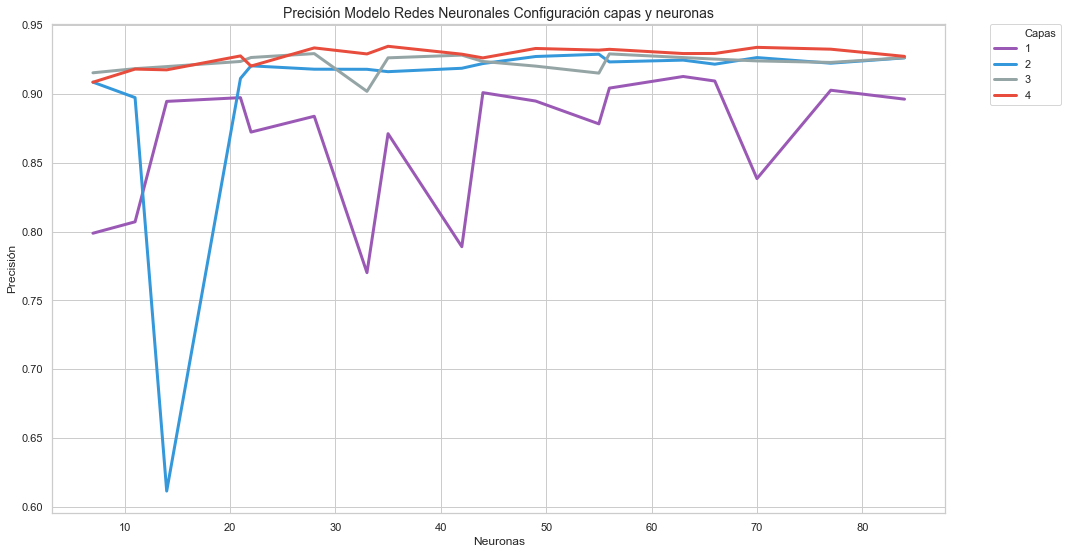

In [21]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]

palette = sns.color_palette(colors)
plt.figure(figsize=(16,9))

sns.set(style="whitegrid", rc={"lines.linewidth": 3})

capas_neurons_graph = sns.lineplot(x="Neuronas", y="Accuracy", hue='Capas', palette=palette , data=capas_neurons_df)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Neuronas')
plt.title("Precisión Modelo Redes Neuronales Configuración capas y neuronas", fontsize=14)
plt.ylabel('Precisión')
saveFigure(capas_neurons_graph, "neural_network-layers-global")

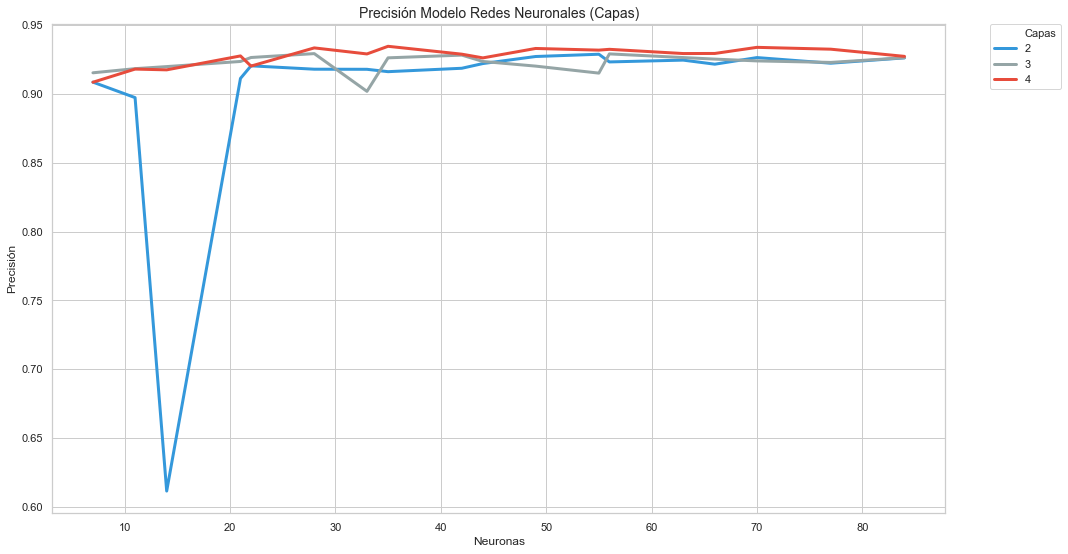

In [22]:
colors = ["#3498db","#95a5a6", "#e74c3c"]
palette = sns.color_palette(colors)
plt.figure(figsize=(16,9))

sns.set(style="whitegrid", rc={"lines.linewidth": 3})

capas_neurons_graph = sns.lineplot(x="Neuronas", y="Accuracy", hue='Capas', palette=palette , data=aux)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Neuronas')
plt.title("Precisión Modelo Redes Neuronales (Capas)", fontsize=14)
plt.ylabel('Precisión')

saveFigure(capas_neurons_graph, "neural_network-layers-global-3y4")